In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
FS=16
matplotlib.rcParams.update({'font.size': FS}) # set font size

## Exploring results files
Lets examine the current folder to see which parameter sweeps are available.

In [9]:
files=os.listdir(os.getcwd())
dates=set()
params=[]
for file in files:
    if ".csv" in file:
        dates.add(file.split('_')[-1].split('.')[0])
dates=sorted(list(dates),reverse=True)
for date in dates:
    for file in files:
        if date in file:
            startind=file.find('results_')+8
            endind=file.find('_sweep',startind)
            params.append(file[startind:endind])
            break

file_df=pd.DataFrame()
file_df['Dates']=dates
file_df['Parameter']=params

['.git', '.ipynb_checkpoints', 'adjacency_matrix_results_coupling_function_sweep_20181219-140324.xlsx', 'adjacency_matrix_results_coupling_function_sweep_20181219-155344.xlsx', 'adjacency_matrix_results_coupling_function_sweep_20181219-163117.xlsx', 'adjacency_matrix_results_noise_level_sweep_20181218-141521 - Copy.xlsx', 'adjacency_matrix_results_noise_level_sweep_20181218-141521.xlsx', 'adjacency_matrix_results_num_osc_sweep_20181218-170411.xlsx', 'adjacency_matrix_results_sigma_freq_sweep_20181217-114703.xlsx', 'community_network_experiments-chimera.ipynb', 'community_network_experiments.ipynb', 'coupling_function_results_coupling_function_sweep_20181219-140324.xlsx', 'coupling_function_results_coupling_function_sweep_20181219-155344.xlsx', 'coupling_function_results_coupling_function_sweep_20181219-163117.xlsx', 'coupling_function_results_noise_level_sweep_20181218-141521.xlsx', 'coupling_function_results_num_osc_sweep_20181218-170411.xlsx', 'coupling_function_results_sigma_freq_sw

The functions below will be used to create a dataframe with the data from the csv files.

In [3]:
def get_param_val_run(df):
    params=[]
    vals=[]
    runs=[]
    for col in df.index:
        col=col.replace(',','=')
        tmp_list=col.split("=")
        params.append(tmp_list[0].replace(' ',''))
        vals.append(tmp_list[1].replace(' ',''))
        runs.append(int(tmp_list[3].replace(' ','')))
    df['parameter']=params
    df['parameter value']=vals
    df['run number']=runs
    return df.reset_index()
def update_data_frames(w_df,A_df,f_df,e_df):
    w_df=get_param_val_run(w_df.T)
    A_df=get_param_val_run(A_df.T)
    f_df=get_param_val_run(f_df.T)
    try: 
        e_df=get_param_val_run(e_df.T)
        return w_df,A_df,f_df,e_df
    except:
        return w_df,A_df,f_df,None

## Displaying results 
Now, we can import the data from the csv files, clean up the data types and display the last few rows in the resulting dataframes.  

In [4]:
index=0  # select the file to load by changing this variable
timestr=dates[index]
loop_parameter=params[index]
filename_suffix=str(loop_parameter) +'_sweep_'+ str(timestr)
try:
    w_df=pd.read_csv('frequency_results_'+ filename_suffix+'.csv',index_col=0)
    f_df=pd.read_csv('coupling_function_results_'+ filename_suffix +'.csv',index_col=0)
    A_df=pd.read_csv('adjacency_matrix_results_'+ filename_suffix +'.csv',index_col=0)
    e_df=pd.read_csv('validation_error_results_'+ filename_suffix +'.csv',index_col=0)
    w_df,A_df,f_df,e_df=update_data_frames(w_df,A_df,f_df,e_df)
    if w_df['parameter'][0] in ['num_osc']:
        w_df['parameter value']=w_df['parameter value'].astype(int)
        A_df['parameter value']=A_df['parameter value'].astype(int)
        f_df['parameter value']=f_df['parameter value'].astype(int)
        e_df['parameter value']=e_df['parameter value'].astype(int)
    elif w_df['parameter'][0] in ['	p_erdos_renyi','sigma_freq']:
        w_df['parameter value']=w_df['parameter value'].astype(float)
        A_df['parameter value']=A_df['parameter value'].astype(float)
        f_df['parameter value']=f_df['parameter value'].astype(float)
        e_df['parameter value']=e_df['parameter value'].astype(float)
    e_df=e_df.rename(columns={0:'Final validation error'})
except:
    print('Does not exist. Try again!')
display(w_df.tail())
display(A_df.tail())
display(f_df.tail())
display(e_df.tail())

,index,Maximum absolute deviation,Mean absolute deviation,Maximum relative deviation (%),Mean relative deviation (%),Correlation,parameter,parameter value,run number
85,"p_erdos_renyi = 0.9, run =5",0.004039,0.002183,6.906713,3.299848,0.999846,p_erdos_renyi,0.9,5
86,"p_erdos_renyi = 0.9, run =6",0.017148,0.007180,30.012209,10.851845,0.996141,p_erdos_renyi,0.9,6
87,"p_erdos_renyi = 0.9, run =7",0.016479,0.003754,21.793308,5.437335,0.996932,p_erdos_renyi,0.9,7
88,"p_erdos_renyi = 0.9, run =8",0.005446,0.002313,5.065963,3.183578,0.999842,p_erdos_renyi,0.9,8
89,"p_erdos_renyi = 0.9, run =9",0.015986,0.004174,18.555702,5.920555,0.996909,p_erdos_renyi,0.9,9


,index,Number of errors,Error rate,Area under ROC curve,Best f1 score,Threshold for best f1 score,Threshold range for >90.0% of best f1 score,parameter,parameter value,run number
85,"p_erdos_renyi = 0.9, run =5",0.0,0.0,1.0,1.0,0.09503380209207535,"[0.00784346, 0.93264717]",p_erdos_renyi,0.9,5
86,"p_erdos_renyi = 0.9, run =6",2.0,4.444444444444445,0.8345864661654134,0.9736842105263158,0.278704971075058,"[0.01960808, 0.8148005]",p_erdos_renyi,0.9,6
87,"p_erdos_renyi = 0.9, run =7",1.0,2.2222222222222223,0.981203007518797,0.9866666666666666,0.1452215611934662,"[0.016503604, 0.9307174]",p_erdos_renyi,0.9,7
88,"p_erdos_renyi = 0.9, run =8",0.0,0.0,1.0,1.0,0.07197313755750656,"[0.015960667, 0.93192095]",p_erdos_renyi,0.9,8
89,"p_erdos_renyi = 0.9, run =9",1.0,2.2222222222222223,0.9887218045112782,0.9866666666666666,0.1351889818906784,"[0.0062642205, 0.93232316]",p_erdos_renyi,0.9,9


,index,Area between predicted and true coupling function,Area between true coupling function and axis,Area ratio,parameter,parameter value,run number
85,"p_erdos_renyi = 0.9, run =5",0.134251,3.999997,0.033563,p_erdos_renyi,0.9,5
86,"p_erdos_renyi = 0.9, run =6",0.137225,3.999997,0.034306,p_erdos_renyi,0.9,6
87,"p_erdos_renyi = 0.9, run =7",0.116561,3.999997,0.029140,p_erdos_renyi,0.9,7
88,"p_erdos_renyi = 0.9, run =8",0.100097,3.999997,0.025024,p_erdos_renyi,0.9,8
89,"p_erdos_renyi = 0.9, run =9",0.200092,3.999997,0.050023,p_erdos_renyi,0.9,9


,index,Final validation error,parameter,parameter value,run number
85,"p_erdos_renyi = 0.9, run =5",0.000016,p_erdos_renyi,0.9,5
86,"p_erdos_renyi = 0.9, run =6",0.000005,p_erdos_renyi,0.9,6
87,"p_erdos_renyi = 0.9, run =7",0.000017,p_erdos_renyi,0.9,7
88,"p_erdos_renyi = 0.9, run =8",0.000050,p_erdos_renyi,0.9,8
89,"p_erdos_renyi = 0.9, run =9",0.000014,p_erdos_renyi,0.9,9


Now we import some custom plotting functions.

In [5]:
import plot_learning_results as plr
import importlib as imp
imp.reload(plr)
columns=['Number of errors',
 'Error rate',
 'Area under ROC curve',
 'Best f1 score',
 'Threshold for best f1 score',
 'Threshold range for >90.0% of best f1 score',
 'Maximum absolute deviation',
 'Mean absolute deviation',
 'Maximum relative deviation (%)',
 'Mean relative deviation (%)',
 'Correlation',
 'Area between predicted and true coupling function',
 'Area between true coupling function and axis',
 'Area ratio',
 'Final validation error']
print("Here are the columns you can plot:")
print(columns)

Here are the columns you can plot:
['Number of errors', 'Error rate', 'Area under ROC curve', 'Best f1 score', 'Threshold for best f1 score', 'Threshold range for >90.0% of best f1 score', 'Maximum absolute deviation', 'Mean absolute deviation', 'Maximum relative deviation (%)', 'Mean relative deviation (%)', 'Correlation', 'Area between predicted and true coupling function', 'Area between true coupling function and axis', 'Area ratio', 'Final validation error']


Now we can select a subset of those columns and plot the results.  There are a few properties you might want to experiment with:
* `figsize` sets the figure size.
*  Since there are multiple runs for each network, you have the option of using either dot plots (`box=False`) or box plots (`box=True`) to group the points for each network.  
* The `Threshold range for >90.0% of best f1 score` column has values for lower and upper bounds.  These are displayed using a bar chart.  You can set the width of the bars with the `bar_width` parameter.

Column: Number of errors


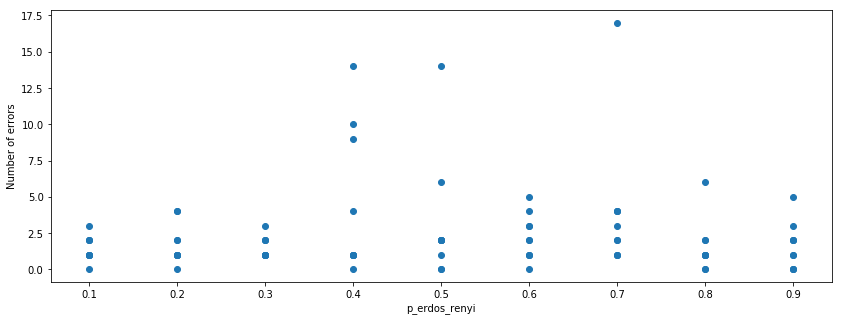

Column: Error rate


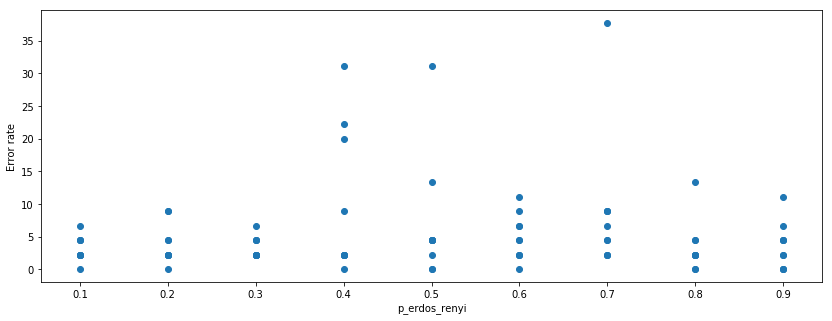

Column: Area under ROC curve


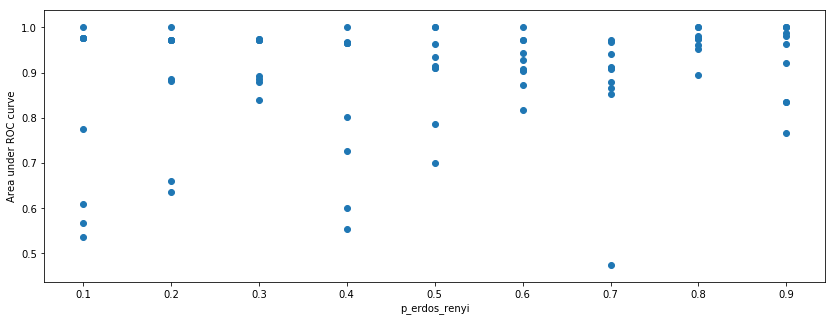

Column: Best f1 score


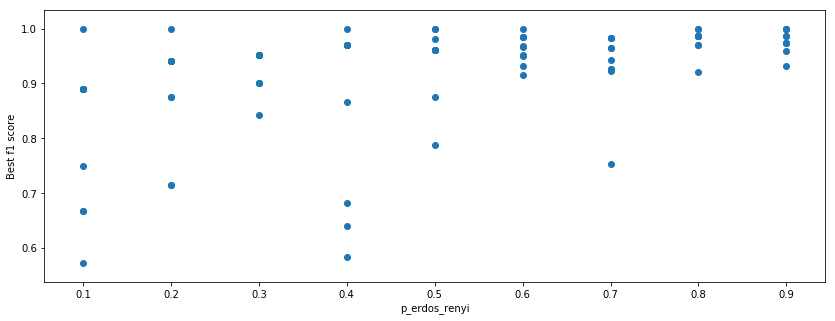

Column: Threshold for best f1 score


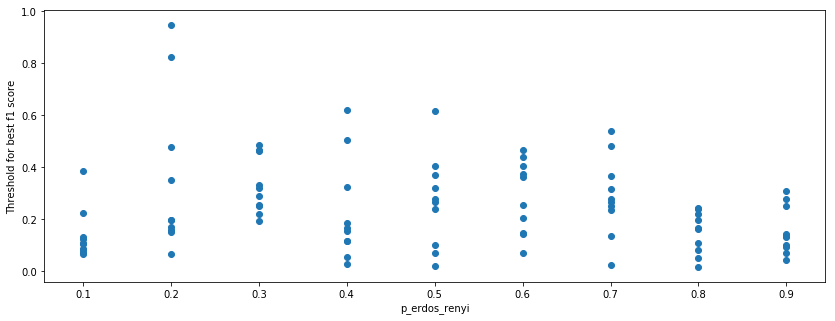

Column: Threshold range for >90.0% of best f1 score


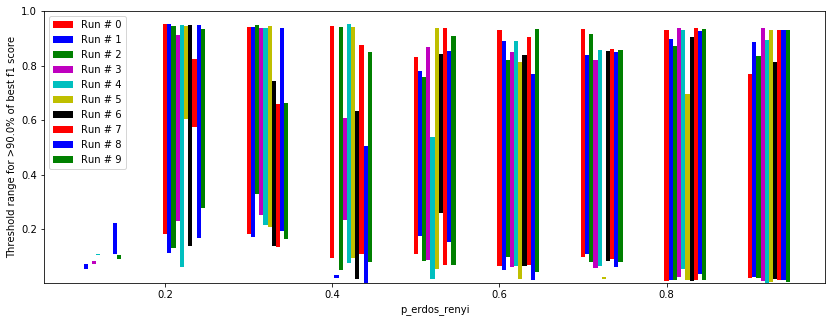

Column: Maximum absolute deviation


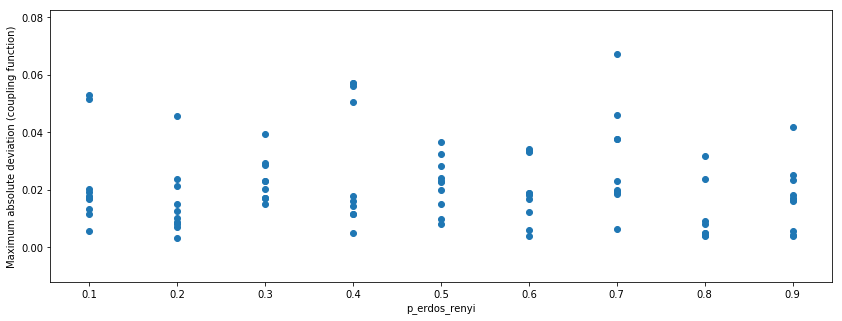

Column: Mean absolute deviation


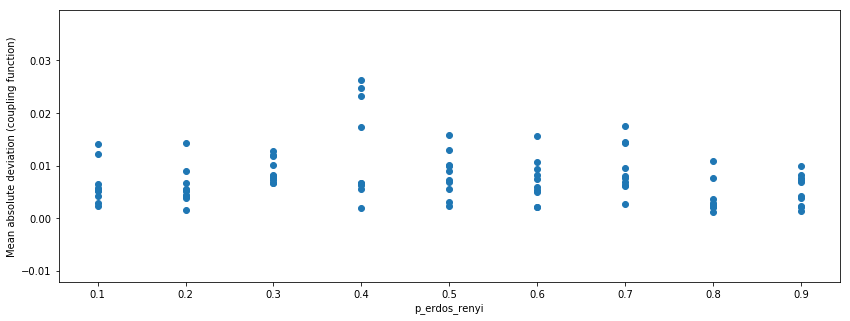

Column: Maximum relative deviation (%)


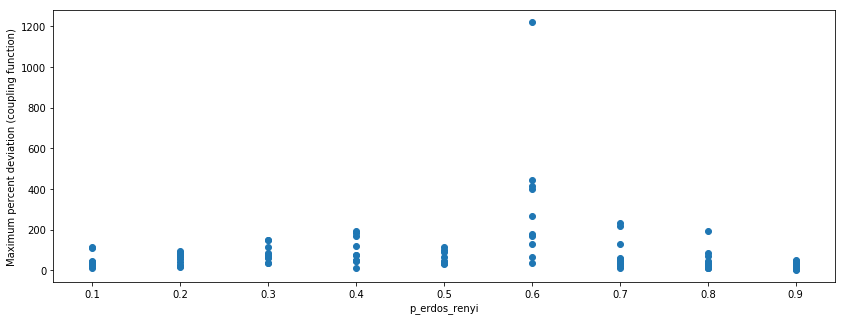

Column: Mean relative deviation (%)


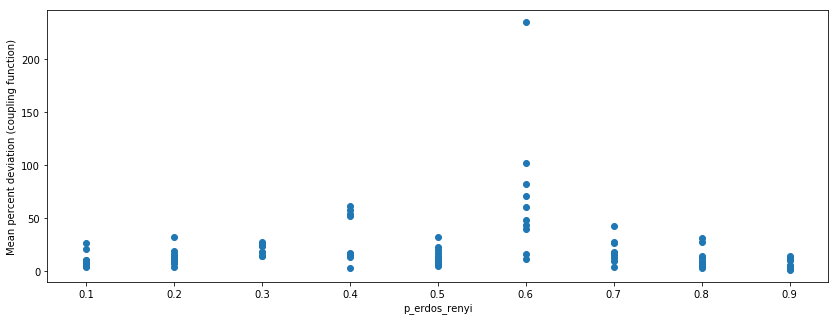

Column: Correlation


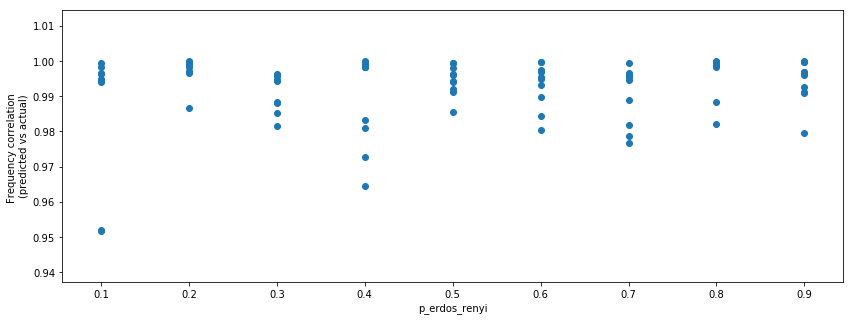

Column: Area between predicted and true coupling function


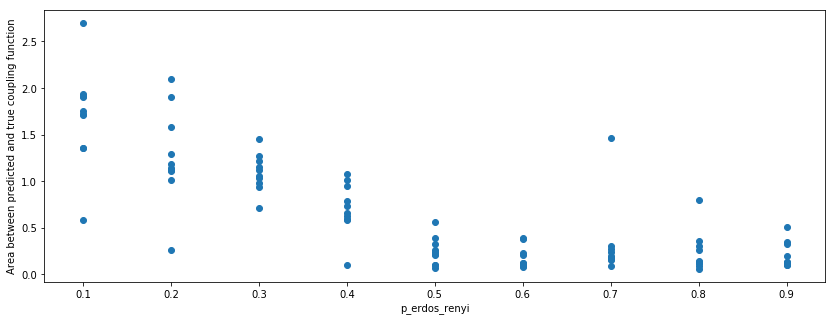

Column: Area between true coupling function and axis


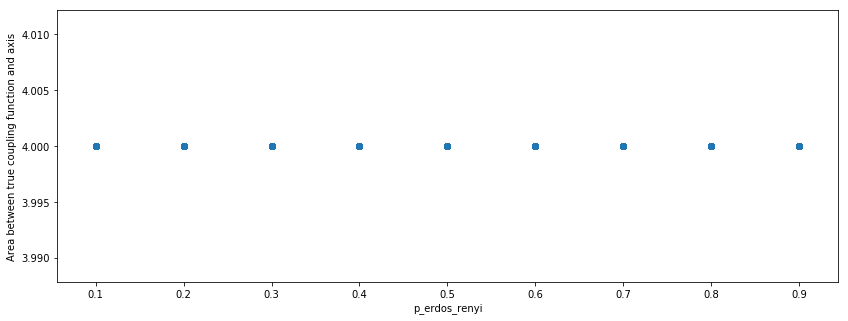

Column: Area ratio


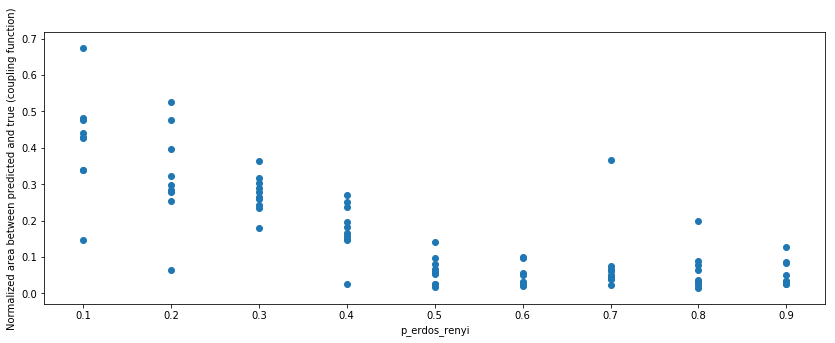

Column: Final validation error


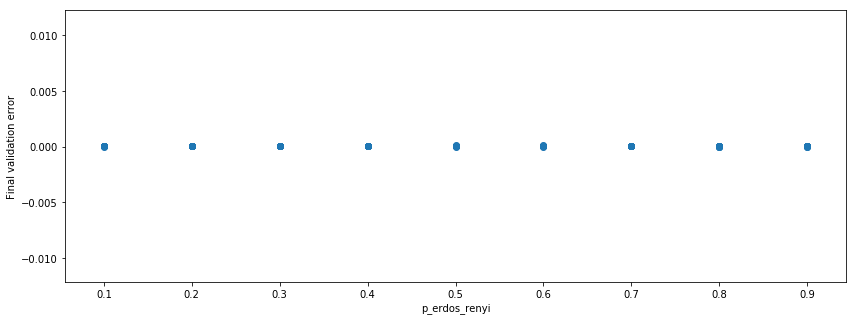

In [6]:
k=6
## single column
columns_2_plot=[columns[k]]
## multiple columns
columns_2_plot=columns[0:]

for col in columns_2_plot:
    print("Column:", col)   
    plr.plot_results(col,w_df,A_df,f_df,e_df,
                 figsize=(14,5),
                 box=False,
                 bar_width=0.005)


We can also plot only the results for the best run as measured by the validation error.

Column: Number of errors


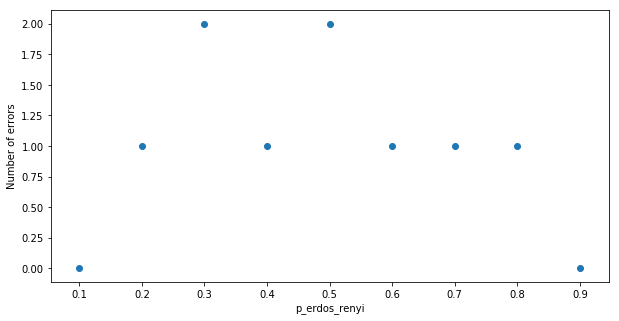

Column: Error rate


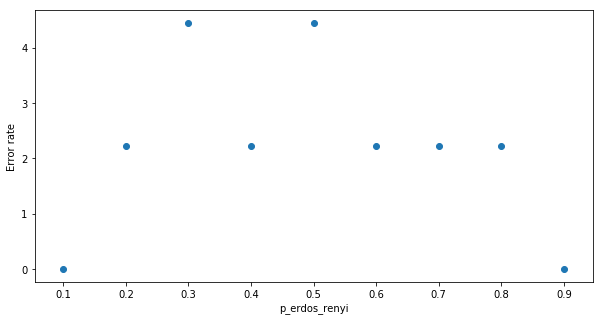

Column: Area under ROC curve


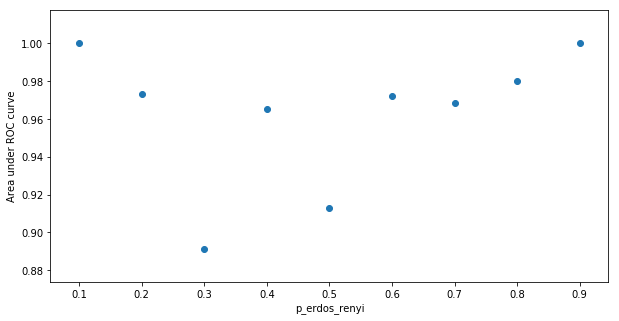

Column: Best f1 score


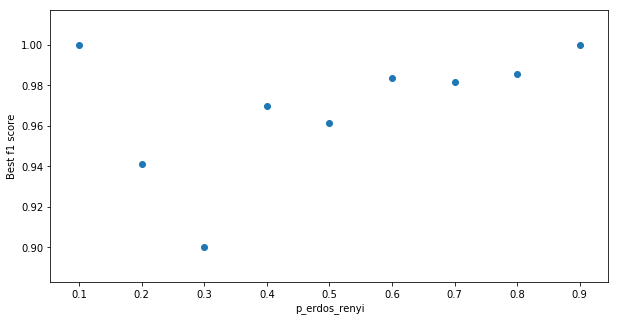

Column: Threshold for best f1 score


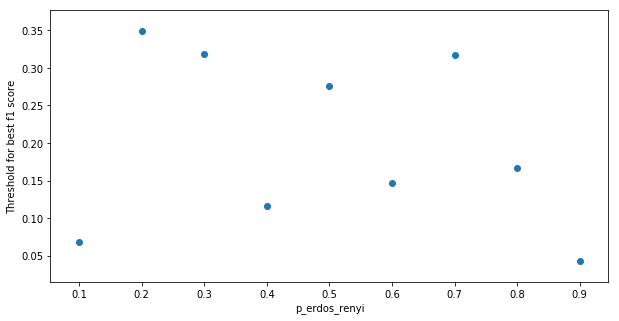

Column: Threshold range for >90.0% of best f1 score


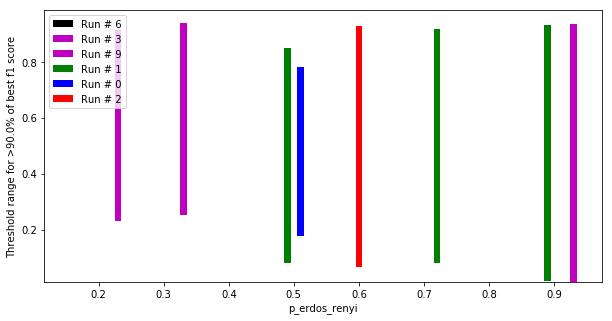

Column: Maximum absolute deviation


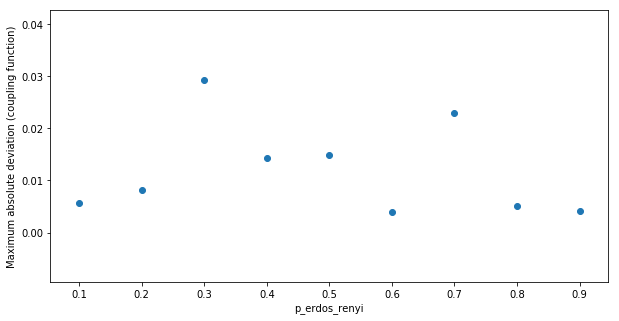

Column: Mean absolute deviation


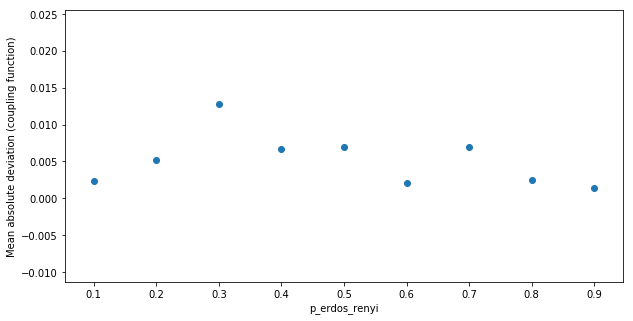

Column: Maximum relative deviation (%)


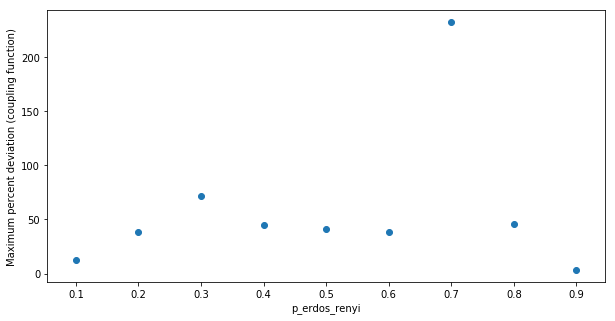

Column: Mean relative deviation (%)


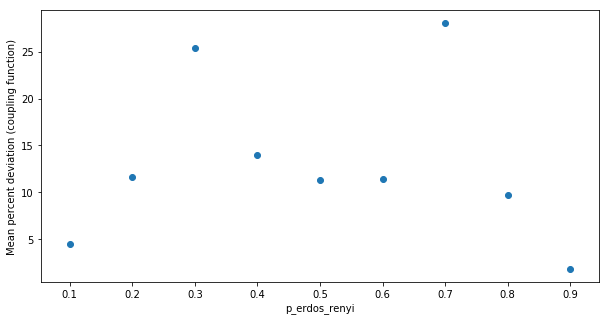

Column: Correlation


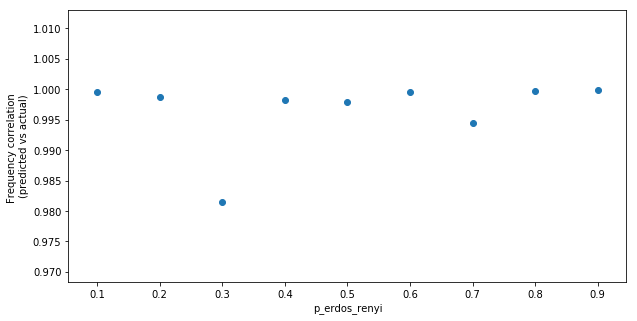

Column: Area between predicted and true coupling function


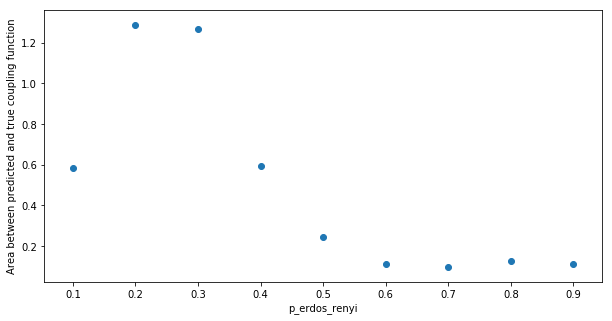

Column: Area between true coupling function and axis


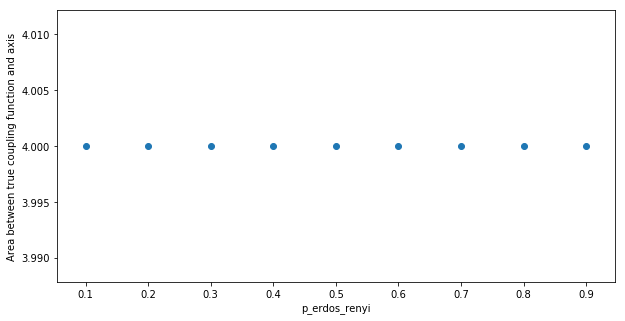

Column: Area ratio


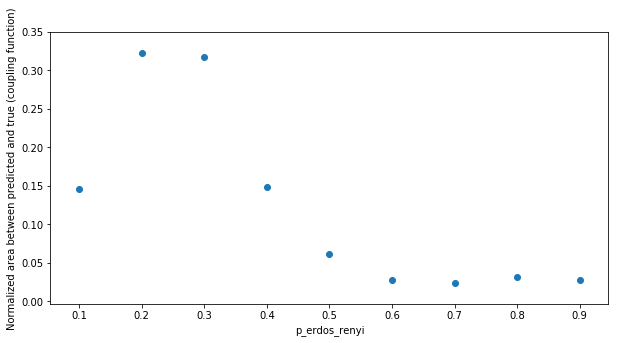

Column: Final validation error


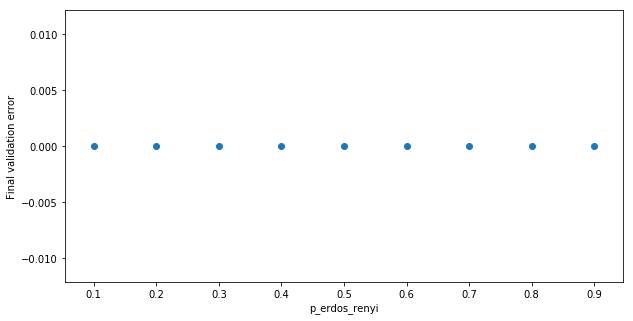

In [7]:
## single column
columns_2_plot=[columns[k]]
## multiple columns
columns_2_plot=columns[0:]
for col in columns_2_plot:
    print("Column:", col)  
    plr.plot_best(col,w_df,A_df,f_df,e_df,figsize=(14,5),bar_width=0.005)